<a href="https://colab.research.google.com/github/enesergen/TensorflowFundamentalCourseWithDaniel/blob/main/02_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles
#make 1000 examples
n_samples=1000
#create circles
X,y=make_circles(n_samples,noise=0.03,random_state=42)

In [2]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [4]:
import pandas as pd
circles=pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


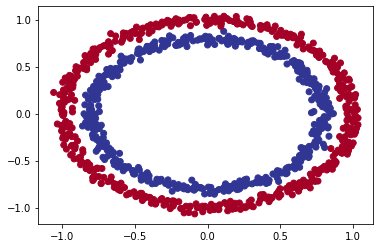

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

**[Tensorflow Simulasyon](https://playground.tensorflow.org
)** Playground

#Input and  output shapes

In [6]:
X.shape,y.shape

((1000, 2), (1000,))

##Steps in modelling

1. Create or import a model
2. Compile the model
3. try to fit the model 
4. evaluate model 
5. tweak 
6. evaluate ...

In [7]:
#set random seed
import tensorflow as tf
tf.random.set_seed(42)

#create a model
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
#compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])
#fit the model
model_1.fit(X,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4820


In [8]:
#lets try and improve our model
model_1.fit(X,y,epochs=200,verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we're working on a binary classification problem and our model is getting around %50 accuracy it's performing as if it's guessing.

So let's step thinng up a notch and add an extra layer

In [9]:
tf.random.set_seed(42)
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])
model_2.fit(X,y,epochs=100,verbose=0)

In [10]:
model_2.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314204216003, 0.5]

Pek de bir şey değişmedi extra katman eklememize rağmen

##Improving our model
Let's look into our [bag of tricks(eldeki imkanlar)] to see how we can improve our model.

1. Create a model - We might add more layers or increate the number of hidden units within a layer

2. Compiling a model - We might choose a different optimization function such as Adam istead of SGD

3. Fitting a model - we might fit our model for more epochs

In [11]:
tf.random.set_seed(42)
#craete the model this time will be  3 layers
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_3.fit(X,y,epochs=100,verbose=0)

In [12]:
model_3.evaluate(X,y) #hiç bir gelişme yok galiba umutsuz vaka :)

32/32 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980254650115967, 0.5080000162124634]

In [13]:
import numpy as np

In [14]:
def plot_decision_boundary(model,X,y):
  x_min,x_max=X[:,0].min()-0.1,X[:,1].max()+0.1
  y_min,y_max=X[:,1].min()-0.1,X[:,1].max()+0.1
  xx,yy=np.meshgrid(np.linspace(x_min,x_max,100),np.linspace(y_min,y_max,100))
  
  x_in=np.c_[xx.ravel(),yy.ravel()]
  y_pred=model.predict(x_in)

  if len(y_pred[0])>1:
    print("doing multi-class classification")
    y_pred=np.argmax(y_pred,axis=1).reshape(xx.shape)
  else:
    print("doing binary classificationy")
    y_pred=np.round(y_pred).reshape(xx.shape)

  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
  plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())


313/313 [==============================] - 0s 1ms/step
doing binary classificationy


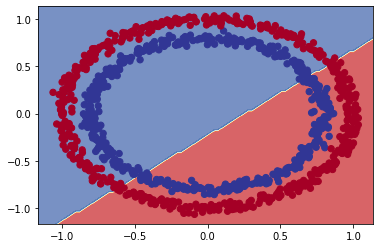

In [15]:
#@title Default title text
plot_decision_boundary(model=model_3,X=X,y=y)

#The missing piece:Non-linearity

In [16]:
tf.random.set_seed(42)
model_4=tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.linear)
])
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])
history=model_4.fit(X,y,epochs=100)

Epoch 1/100


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 0s 1ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9620 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8984 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8595 - accuracy: 0.4110
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8580 - accuracy: 0.4110
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8575 - accuracy: 0.4110
Epoch 11/100
32/32 [=

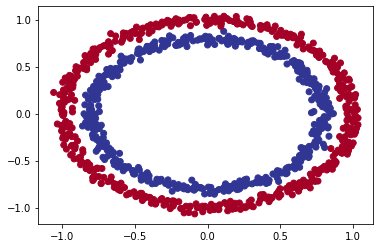

In [17]:
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)


313/313 [==============================] - 0s 1ms/step
doing binary classificationy


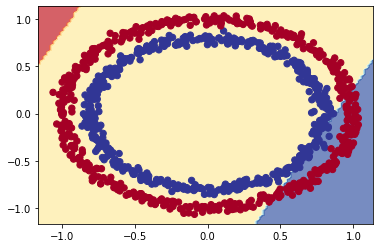

In [18]:
plot_decision_boundary(model_4,X,y)

In [19]:
tf.random.set_seed(42)
model_5=tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.relu)
])
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])
model_5.fit(X,y,epochs=100,verbose=0)

313/313 [==============================] - 0s 962us/step
doing binary classificationy


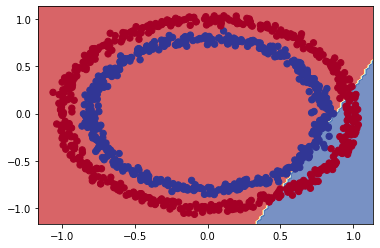

In [20]:
plot_decision_boundary(model_5,X,y)

In [21]:
tf.random.set_seed(42)

model_6=tf.keras.Sequential([
  tf.keras.layers.Dense(100,activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(10,activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])

model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
            optimizer=tf.keras.optimizers.Adam(lr=0.001),
            metrics=["accuracy"])
history=model_6.fit(X,y,epochs=150,verbose=0)

313/313 [==============================] - 0s 1ms/step
doing binary classificationy


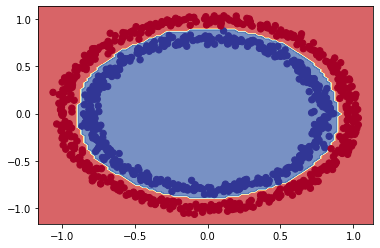

In [22]:
plot_decision_boundary(model_6,X,y)

In [23]:
model_6.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0018 - accuracy: 1.0000


[0.0018204950029030442, 1.0]

In [24]:
#create toy tensor
A=tf.cast(tf.range(-10,10),dtype=tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

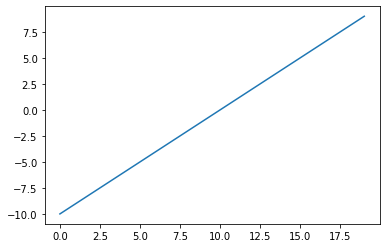

In [25]:
#visualize
plt.plot(A)

In [26]:
#lets replicate sigmoid
def sigmoid(x):
  return 1/(1+tf.exp(-x))

In [27]:
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

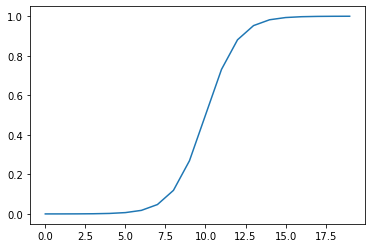

In [28]:
plt.plot(sigmoid(A))

In [29]:
#lets recreate ReLu function
def relu(x):
  return tf.maximum(0,x)

In [30]:
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

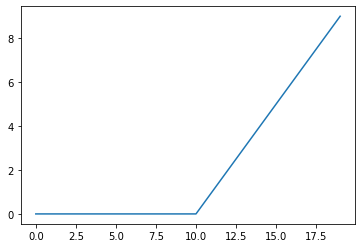

In [31]:
plt.plot(relu(A))

In [32]:
#let's try linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

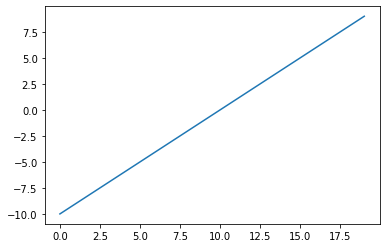

In [33]:
plt.plot(tf.keras.activations.linear(A))#değişen olmadı aynı

In [34]:
A==tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

In [35]:
#split into train and test sets
X_train,y_train=X[:800],y[:800]
X_test,y_test=X[800:],y[800:]
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [36]:
tf.random.set_seed(42)
model_7=tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                 metrics=["accuracy"])
history=model_7.fit(X_train,y_train,epochs=50)

Epoch 1/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6876 - accuracy: 0.5213
Epoch 2/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6718 - accuracy: 0.5888
Epoch 3/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6516 - accuracy: 0.6225
Epoch 4/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6127 - accuracy: 0.7725
Epoch 5/50
25/25 [==============================] - 0s 2ms/step - loss: 0.5569 - accuracy: 0.8163
Epoch 6/50
25/25 [==============================] - 0s 1ms/step - loss: 0.4761 - accuracy: 0.9038
Epoch 7/50
25/25 [==============================] - 0s 1ms/step - loss: 0.3993 - accuracy: 0.9262
Epoch 8/50
25/25 [==============================] - 0s 2ms/step - loss: 0.3131 - accuracy: 0.9588
Epoch 9/50
25/25 [==============================] - 0s 1ms/step - loss: 0.2343 - accuracy: 0.9887
Epoch 10/50
25/25 [==============================] - 0s 1ms/step - loss: 0.1719 - accuracy: 0.9925
Epoch 11/50
25/25 [

In [37]:
model_7.evaluate(X_test,y_test)#model gayet iyi çalışıyor

7/7 [==============================] - 0s 3ms/step - loss: 0.0084 - accuracy: 1.0000


[0.008396316319704056, 1.0]

313/313 [==============================] - 0s 1ms/step
doing binary classificationy
313/313 [==============================] - 0s 1ms/step
doing binary classificationy


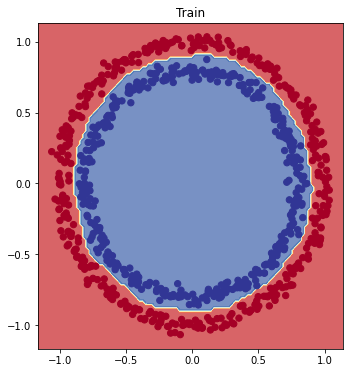

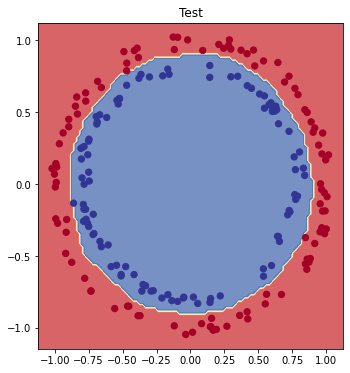

In [38]:
#plot decision boundaries
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_7,X_train,y_train)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Test")
plot_decision_boundary(model_7,X_test,y_test)

##Plot the loss(training) curves

Text(0.5, 1.0, 'Model_7 loss curves')

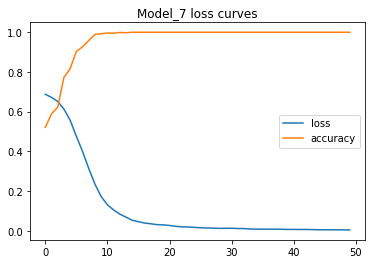

In [39]:
pd.DataFrame(history.history).plot()
plt.title("Model_7 loss curves")

##Finding the best learning rate
we will use callback


In [40]:
tf.random.set_seed(42)
model_8=tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model_8.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])
#create a learning rate callback
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4 * 10**(epoch/20))

history_8=model_8.fit(X_train,y_train,epochs=100,callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6952 - accuracy: 0.5050 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6947 - accuracy: 0.5063 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.5075 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.5075 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5075 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6927 - accuracy: 0.5100 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.5163 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6915 - accuracy: 0.5163 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

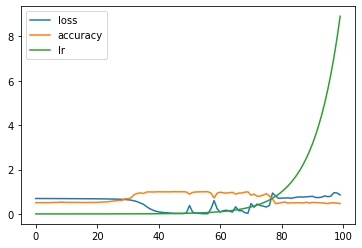

In [41]:
pd.DataFrame(history_8.history).plot()

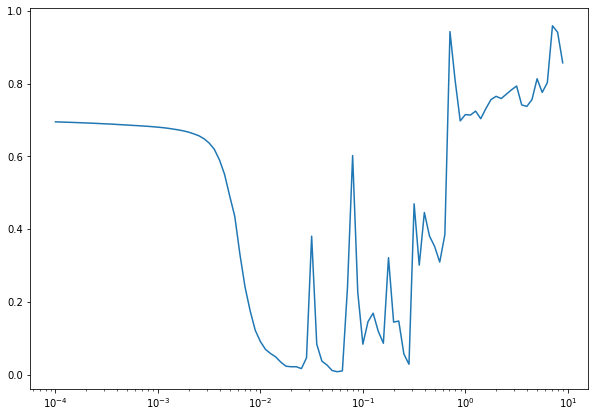

In [43]:
lrs=1e-4*(10**(np.arange(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history_8.history["loss"])

In [45]:
tf.random.set_seed(42)
model_9=tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model_9.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),metrics=["accuracy"])
history_9=model_9.fit(X_train,y_train,epochs=20)


Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 0.6864 - accuracy: 0.5850
Epoch 2/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6594 - accuracy: 0.6413
Epoch 3/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5960 - accuracy: 0.7425
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4607 - accuracy: 0.8925
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2856 - accuracy: 0.9762
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.1650 - accuracy: 0.9912
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.0960 - accuracy: 0.9975
Epoch 8/20
25/25 [==============================] - 0s 1ms/step - loss: 0.0675 - accuracy: 0.9962
Epoch 9/20
25/25 [==============================] - 0s 1ms/step - loss: 0.0501 - accuracy: 0.9962
Epoch 10/20
25/25 [==============================] - 0s 1ms/step - loss: 0.0434 - accuracy: 0.9962
Epoch 11/20
25/25 [

In [46]:
model_9.evaluate(X_test,y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.0277 - accuracy: 0.9900


[0.027713382616639137, 0.9900000095367432]

In [48]:
model_7.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0084 - accuracy: 1.0000


[0.008396316319704056, 1.0]

313/313 [==============================] - 1s 3ms/step
doing binary classificationy
313/313 [==============================] - 0s 1ms/step
doing binary classificationy


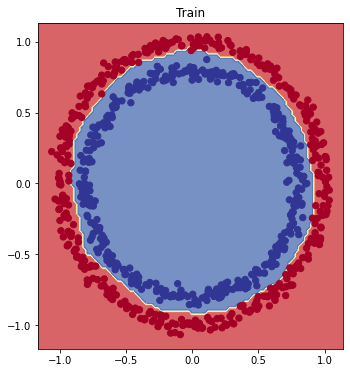

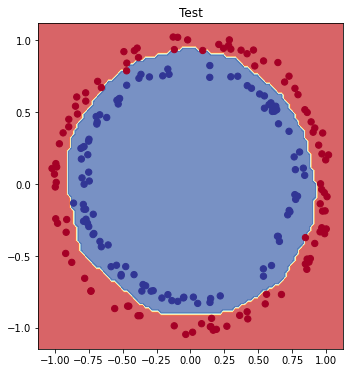

In [51]:
#plot decision boundaries
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_9,X_train,y_train)
plt.figure(figsize=(12,6))
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_9,X_test,y_test)
plt.show()

##More classification evaluation metrics
* Accuracy
* Precision
* Recall
* F1-Score
* Confusion matrix
* Classification Report(sckit learn)

In [52]:
#check the accuracy of our model
loss,accuracy=model_9.evaluate(X_test,y_test)
print(f"Model loss on the test set:{loss}")
print(f"Model accuracy on the test set:{accuracy}")

7/7 [==============================] - 0s 2ms/step - loss: 0.0277 - accuracy: 0.9900
Model loss on the test set:0.027713382616639137
Model accuracy on the test set:0.9900000095367432


In [53]:
from sklearn.metrics import confusion_matrix
#make a prediction
y_preds=model_9.predict(X_test)
#create confusion matrix
confusion_matrix(y_test,y_preds)

7/7 [==============================] - 0s 2ms/step


ValueError: ignored

In [54]:
y_preds[:10]

array([[0.9997405 ],
       [0.99998057],
       [0.99924093],
       [0.99993336],
       [0.04301187],
       [0.00423115],
       [0.9977271 ],
       [0.00747168],
       [0.99958646],
       [0.00133507]], dtype=float32)

In [55]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

y_preds içinde probability değerli veriyor yani 0 veya 1 değil. confusion matrix yapabilmek için bunları 0 veya 1 lere dönüştürmeliyiz.
Problem:ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [57]:
#convert our prediction probabilities to binary format
tf.round(y_preds[:10])

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [58]:
#create confusion matrix
confusion_matrix(y_test,tf.round(y_preds))

array([[99,  2],
       [ 0, 99]])

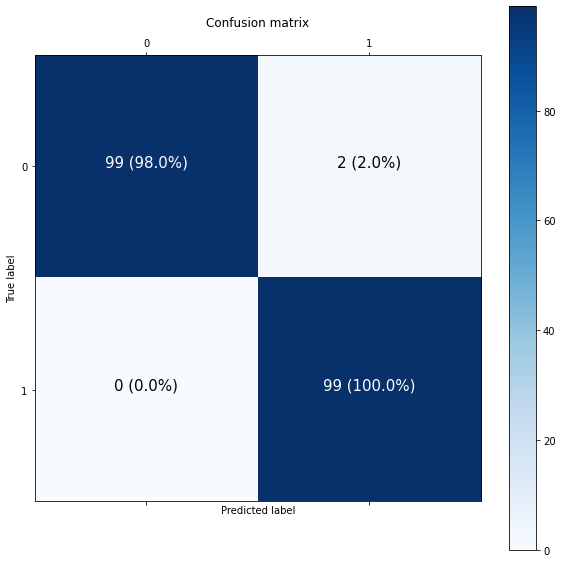

In [70]:
from prompt_toolkit.layout.containers import HorizontalAlign
import itertools
figsize=(10,10)
#create the confusion matrix
cm=confusion_matrix(y_test,tf.round(y_preds))
cm_norm=cm.astype("float")/cm.sum(axis=1)[:,np.newaxis]
n_classes=cm.shape[0]
fig,ax=plt.subplots(figsize=figsize)
cax=ax.matshow(cm,cmap=plt.cm.Blues)
fig.colorbar(cax)

classes=False

if classes:
  labels=classes
else:
  labels=np.arange(cm.shape[0])

ax.set(title="Confusion matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)
threshold=(cm.max()+cm.min())/2.

for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
  plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i,j]>threshold else "black",
           size=15)

In [60]:
cm_norm

array([[0.98019802, 0.01980198],
       [0.        , 1.        ]])

## Working with a larger example(Multiclass classification)